In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('sqf-2017.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11629 entries, 0 to 11628
Data columns (total 86 columns):
STOP_FRISK_ID                                                   11629 non-null int64
STOP_FRISK_DATE                                                 11629 non-null object
STOP_FRISK_TIME                                                 11624 non-null object
YEAR2                                                           11629 non-null int64
MONTH2                                                          11629 non-null object
DAY2                                                            11629 non-null object
STOP_WAS_INITIATED                                              11629 non-null object
SPRINT_NUMBER                                                   11202 non-null object
RECORD_STATUS_CODE                                              11629 non-null object
ISSUING_OFFICER_RANK                                            11629 non-null object
ISSUING_OFFICER_COMMAND_CODE     

In [8]:
df[]

SyntaxError: invalid syntax (<ipython-input-8-71f11347ebfc>, line 1)

In [9]:
df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [10]:
df.groupby('STOP_LOCATION_BORO_NAME')['FRISKED_FLAG'].count()

STOP_LOCATION_BORO_NAME
(null)        410
155070          1
190241          1
208169          1
208760          2
210334          1
237177          1
986759          1
BRONX        2473
BROOKLYN     3328
MANHATTAN    2771
PBBN            3
PBBS            1
PBBX            5
PBMN            3
PBMS            1
PBSI            1
QUEENS       2079
STATEN IS     546
Name: FRISKED_FLAG, dtype: int64

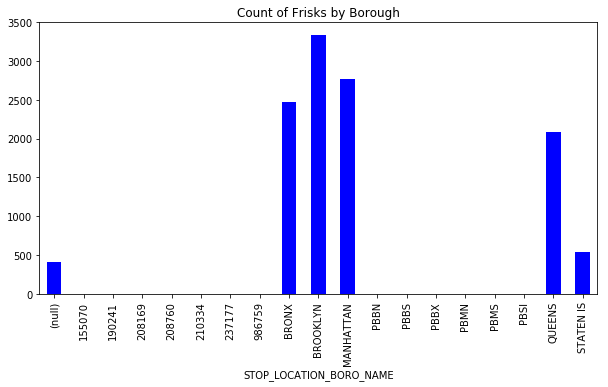

In [11]:
df.groupby('STOP_LOCATION_BORO_NAME')['FRISKED_FLAG'].count().plot(kind = 'bar', color = 'blue', title = 'Count of Frisks by Borough', figsize = (10, 5))

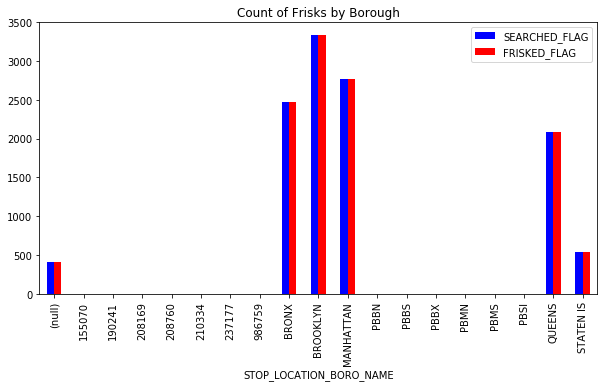

In [12]:
df.groupby('STOP_LOCATION_BORO_NAME')[['SEARCHED_FLAG','FRISKED_FLAG']].count().plot(kind = 'bar', color = ['blue', 'red'], title = 'Count of Frisks by Borough', figsize = (10, 5))

In [17]:
five_boroughs = df[(df['STOP_LOCATION_BORO_NAME'] == 'MANHATTAN') | (df['STOP_LOCATION_BORO_NAME'] == 'BRONX') | (df['STOP_LOCATION_BORO_NAME'] == 'BROOKLYN') | (df['STOP_LOCATION_BORO_NAME'] == 'STATEN IS') | (df['STOP_LOCATION_BORO_NAME'] ==  'QUEENS')]

In [18]:
five_boroughs.STOP_LOCATION_BORO_NAME.value_counts()

BROOKLYN     3328
MANHATTAN    2771
BRONX        2473
QUEENS       2079
STATEN IS     546
Name: STOP_LOCATION_BORO_NAME, dtype: int64

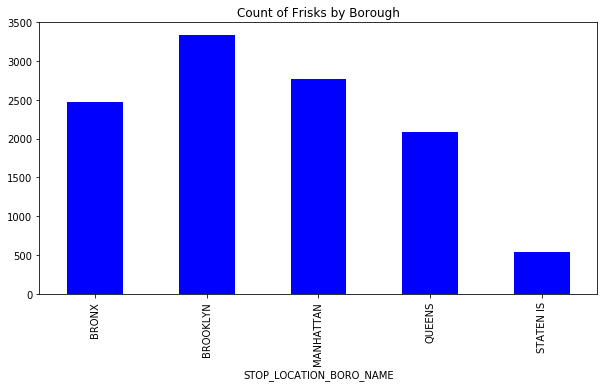

In [19]:
five_boroughs.groupby('STOP_LOCATION_BORO_NAME')['FRISKED_FLAG'].count().plot(kind = 'bar', color = 'blue', title = 'Count of Frisks by Borough', figsize = (10, 5))

In [20]:
df['OBSERVED_DURATION_MINUTES'].describe()

count    11629.000000
mean        28.940838
std        975.822879
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      99999.000000
Name: OBSERVED_DURATION_MINUTES, dtype: float64

In [21]:
df.shape

(11629, 86)

In [22]:
df[df['OBSERVED_DURATION_MINUTES'] <= 120].shape

(11521, 86)

In [23]:
108/11629

0.009287127010061054

In [24]:
11629 - 11521

108

In [25]:
trimmed_time = df[df['OBSERVED_DURATION_MINUTES'] <= 120]

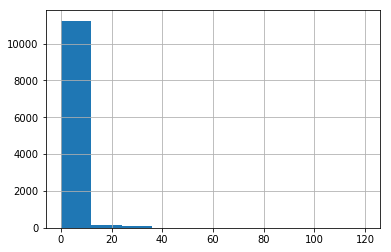

In [26]:
trimmed_time['OBSERVED_DURATION_MINUTES'].hist()

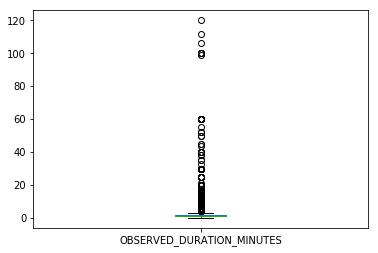

In [27]:
trimmed_time['OBSERVED_DURATION_MINUTES'].plot(kind = 'box')